## PennDOT Crash Statistical Analysis

### Research Question 1: Are the total crashes for 2020 outside the 95% confidence interval?
### Research Question 2: Are the total crashes from 2001-2010 significantly different than total crashes from 2011-2019?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#import crash data statistics csv data file in dataframe
df = pd.read_excel('Crash_Statistics.xlsx')

In [3]:
pd.set_option('display.max_columns', None)
df.head()
#appears the table would work better transposed

,Statewide Crash Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,Total Crashes,131726.0,138367.0,140541.0,138166.0,134184.0,129159.0,131905.0,126067.0,121762.0,121608.0,125322.0,124062.0,124077.0,121309.0,127127.0,129395.0,128188.0,128420.0,125267.0,104472.0
3,"Unrestrained Crashes (Pass. Cars, Lt Trks, Hvy...",25954.0,26842.0,22661.0,21343.0,19640.0,19248.0,17839.0,15758.0,15062.0,15512.0,16298.0,15528.0,14436.0,13627.0,13534.0,14992.0,14309.0,12522.0,12562.0,11265.0
4,Pedestrian Crashes,5212.0,5522.0,5067.0,4930.0,4714.0,4638.0,4649.0,4414.0,4215.0,4472.0,4506.0,4537.0,4374.0,4000.0,4001.0,4201.0,4086.0,4129.0,4054.0,2743.0


In [4]:
df=df.drop([0], axis='rows')

In [5]:
df.iloc[0,0]=0

In [6]:
df=df.T

In [7]:
df.columns = df.iloc[0]

In [8]:
df = df.reset_index(drop=True).drop([0])

In [9]:
df = df.rename(columns={0:'Year'})

In [10]:
df['Year'] = df['Year'].astype('int')

In [11]:
df

Statewide Crash Statistics,Year,Total Crashes,"Unrestrained Crashes (Pass. Cars, Lt Trks, Hvy Trks, Vans, SUVs)",Pedestrian Crashes,Non-Motorist Crashes,Motorcyclist Crashes,Bicyclist Crashes,Alcohol-Related Crashes,Drinking Driver Crashes,Impaired Driver Crashes,Speeding Crashes,Distracted Driver Crashes,Heavy Truck Crashes,Aggressive Driving Crashes,Lane Departure Crashes,Single Vehicle Run-Off-the-Road Crashes,Hit Fixed Object Crashes,Hit Tree Crashes,Hit Utility Pole Crashes,Hit Guiderail Crashes,Head-on / Opposite Direction Side Swipe Crashes,Intersection Crashes,Signalized Intersection Crashes,Stop Controlled Intersection Crashes,Running Red Light Crashes (any factor),Crashes Involving a 65+ Year Old Driver,Crashes Involving a 65-74 Year Old Driver,Crashes Involving a 75+ Year Old Driver,Local Road (only) Crashes,Work Zone Crashes,Winter Condition Crashes,Crashes Involving a 16-17 Year Old Driver,Crashes Involving a 16 Year Old Driver,Crashes Involving a 17 Year Old Driver,Drowsy/Asleep Driver Crashes,Train/Trolley with Motor Vehicle Crashes,Vehicle Failure Related Crashes (any factor)
1,2001,131726.0,25954.0,5212.0,7418.0,2989.0,1794.0,13863.0,13639.0,14428.0,5530.0,9638.0,6547.0,NaN,40897.0,45396.0,39063.0,10654.0,9454.0,6188.0,7236.0,54298.0,20483.0,22447.0,6195.0,17855.0,9938.0,8537.0,22976.0,2028.0,11773.0,11750.0,3810.0,8112.0,2625.0,78.0,4471.0
2,2002,138367.0,26842.0,5522.0,7924.0,3056.0,1607.0,15615.0,15320.0,16303.0,5388.0,12662.0,6313.0,NaN,44911.0,50585.0,41483.0,10973.0,9761.0,6851.0,8995.0,55556.0,20156.0,20823.0,5532.0,18976.0,10380.0,9180.0,37130.0,2338.0,12682.0,11714.0,3517.0,8354.0,2334.0,84.0,5502.0
3,2003,140541.0,22661.0,5067.0,7160.0,3063.0,1611.0,13773.0,13524.0,14466.0,5097.0,11195.0,6906.0,7001.0,49132.0,53935.0,45542.0,11443.0,10399.0,7884.0,8613.0,54553.0,20079.0,20660.0,5518.0,17941.0,9891.0,8638.0,40322.0,2132.0,20818.0,12020.0,3752.0,8445.0,2042.0,91.0,5529.0
4,2004,138166.0,21343.0,4930.0,7217.0,3648.0,1670.0,13703.0,13437.0,14524.0,5640.0,12371.0,6886.0,7451.0,47823.0,52543.0,43469.0,11175.0,10179.0,7824.0,9380.0,54032.0,20430.0,18353.0,5390.0,17815.0,9994.0,8391.0,38115.0,1767.0,17049.0,11325.0,3474.0,7997.0,2207.0,91.0,6138.0
5,2005,134184.0,19640.0,4714.0,6804.0,4070.0,1443.0,13350.0,13084.0,14176.0,5950.0,12141.0,7274.0,7331.0,47138.0,52492.0,43406.0,11067.0,10053.0,7815.0,8771.0,52618.0,19586.0,17761.0,4971.0,17234.0,9541.0,8224.0,38257.0,1910.0,17840.0,10668.0,3273.0,7520.0,2273.0,80.0,5675.0
6,2006,129159.0,19248.0,4638.0,6688.0,3910.0,1415.0,13724.0,13463.0,14828.0,6137.0,12665.0,6670.0,7234.0,43437.0,49024.0,40477.0,10562.0,9397.0,7067.0,8107.0,51930.0,19938.0,17242.0,5250.0,16753.0,9119.0,8146.0,36582.0,1786.0,6668.0,10226.0,3030.0,7322.0,2311.0,89.0,5470.0
7,2007,131905.0,17839.0,4649.0,6710.0,4157.0,1512.0,13222.0,12952.0,14337.0,5669.0,12541.0,7126.0,6935.0,47580.0,52980.0,43967.0,11167.0,10026.0,7603.0,8206.0,49797.0,19206.0,16408.0,4906.0,17047.0,9677.0,7940.0,37581.0,1685.0,17707.0,9783.0,2804.0,7080.0,2242.0,82.0,5408.0
8,2008,126067.0,15758.0,4414.0,6452.0,4216.0,1470.0,12883.0,12629.0,14042.0,4235.0,12242.0,5988.0,4743.0,47314.0,52741.0,43998.0,10681.0,9704.0,7634.0,7779.0,46968.0,18406.0,14704.0,4519.0,16432.0,9547.0,7433.0,34128.0,1427.0,17763.0,8679.0,2328.0,6441.0,2378.0,77.0,5302.0
9,2009,121762.0,15062.0,4215.0,6095.0,3745.0,1402.0,11806.0,11554.0,13215.0,3904.0,12461.0,5262.0,4785.0,43094.0,48351.0,40798.0,9774.0,9295.0,7020.0,7420.0,45729.0,17995.0,14460.0,4346.0,16727.0,9628.0,7625.0,33228.0,1519.0,14713.0,8001.0,2145.0,5928.0,2197.0,73.0,5071.0
10,2010,121608.0,15512.0,4472.0,6442.0,4027.0,1489.0,11682.0,11408.0,13097.0,4010.0,13846.0,5854.0,5813.0,39918.0,45393.0,37631.0,9100.0,8356.0,6665.0,6974.0,46438.0,18330.0,14824.0,4479.0,17606.0,10306.0,7900.0,32521.0,1891.0,11326.0,7127.0,1860.0,5359.0,2411.0,76.0,5274.0


In [12]:
#End of cleaning
#Begin data exploration

<AxesSubplot:xlabel='Year', ylabel='Total Crashes'>

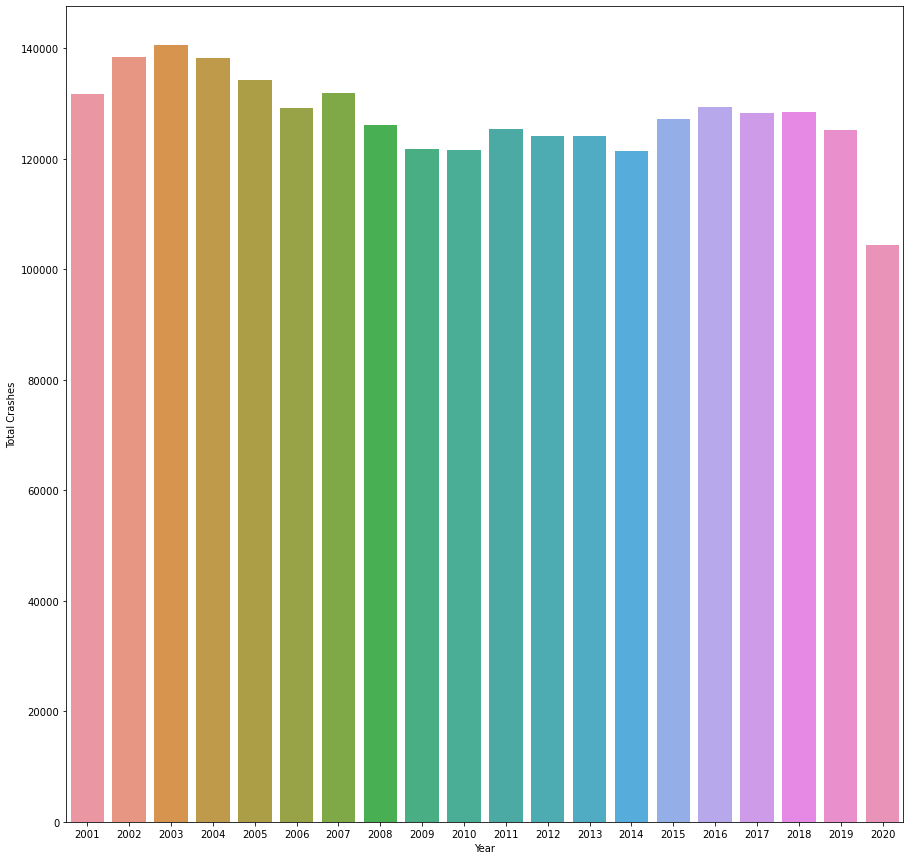

In [13]:
plt.figure(figsize=(15,15))
sns.barplot(data=df, x='Year', y='Total Crashes')
#we can see 2020 is much lower than previous years. Assume in large part due to COVID lockdowns and 
#reduced roadway traffic.

In [14]:
mean1_19 = df['Total Crashes'][:19].mean()
#calculate mean crashes years 2001 through 2019
mean1_19

128771.15789473684

In [15]:
#calculate 95% confidence interval for Total Crashes
conf_int = sm.stats.DescrStatsW(df['Total Crashes']).zconfint_mean()
conf_int

(124127.10502895547, 130985.29497104452)

In [16]:
#Total crashes in 2020
df['Total Crashes'][20] 

104472.0

### Research Question 1 Answer: 2020 total crashes is outside the 95% confidence interval. 104,472 crashes is not within 124,127 to 130,985 crashes

### Research Question 2: Are the total crashes from 2001-2010 significantly different than total crashes from 2011-2019?

In [17]:
#Need to perform a difference in population means 2 sided hypothesis test

In [18]:
mean01_10 = df['Total Crashes'][:11].mean()
mean11_19 = df['Total Crashes'][11:20].mean()

std01_10 = df['Total Crashes'][:11].std()
std11_19 = df['Total Crashes'][11:20].std()

print(mean01_10, mean11_19)
print(std01_10, std11_19)


130800.63636363637 123590.77777777778
6642.404990253564 7621.122453054041


In [19]:
# sample size is < 30 units. Therefore, use t test

In [20]:
sm.stats.ttest_ind(df['Total Crashes'][:11], df['Total Crashes'][11:20])
#output is test stattistic, p value, and degrees of freedom

(2.261170231051814, 0.036369226371427026, 18.0)

In [21]:
#https://www.statsmodels.org/stable/stats.html#basic-statistics-and-t-tests-with-frequency-weights
# for general info, a z test was also performed. 
sm.stats.ztest(df['Total Crashes'][:11], df['Total Crashes'][11:20])
#output is test statistic, p value

(2.261170231051814, 0.023748717749519137)

### Research Question 2 Answer: Total crashes from 2011-2019 are significantly different than total crashes from 2001-2010

### Research Question 2 Part 2: Are the total crashes from 2001-2010 significantly lower than total crashes from 2011-2019?

In [22]:
# altering the research question to specify that crashes in 2011-2019 are lower than 2001-2010. (1 sided test)
sm.stats.ttest_ind(df['Total Crashes'][:11], df['Total Crashes'][11:20], alternative = 'larger')

(2.261170231051814, 0.018184613185713513, 18.0)

### Research Question 2 Part 2 Answer: Total crashes from 2011-2019 are significantly lower than total crashes from 2001-2010